## Loading Data

In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets["num"]

# Convert to binary classification
y[y != 0] = 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

/var/folders/v5/_0ss5l5d6nz8d575gs5spbx40000gn/T/ipykernel_61475/2350250626.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y != 0] = 1


In [162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        239 non-null    float64
 12  thal      240 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 26.5 KB


In [163]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 179 to 184
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        60 non-null     float64
 12  thal      61 non-null     float64
dtypes: float64(3), int64(10)
memory usage: 6.7 KB


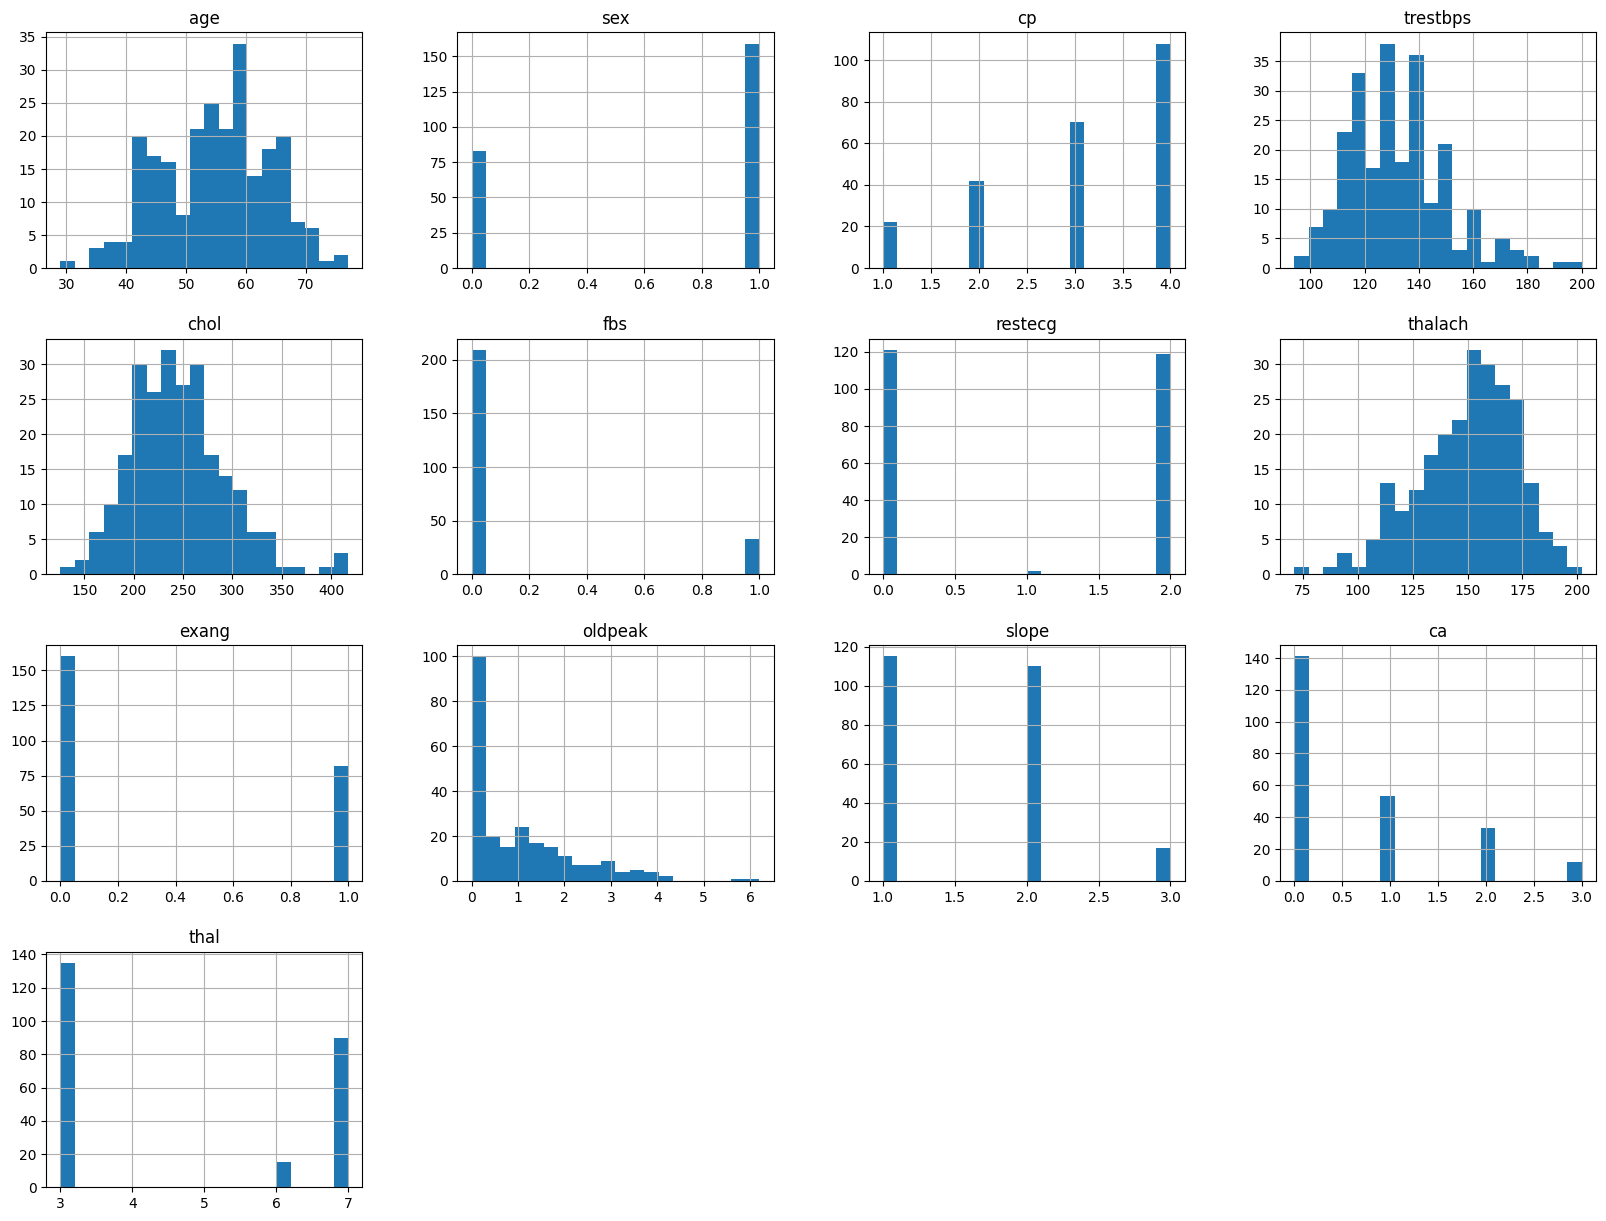

In [164]:
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(20,15))
plt.show()

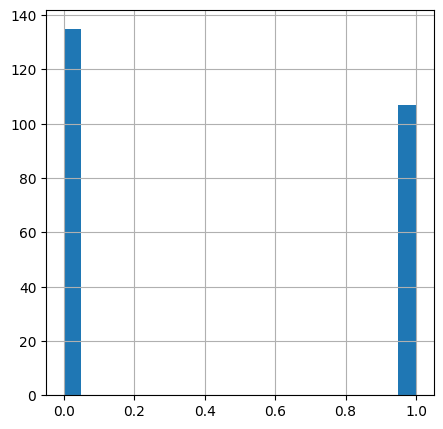

In [165]:
y_train.hist(bins=20, figsize=(5,5))
plt.show()

In [25]:
import pandas as pd

categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
integer_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Encodage des colonnes catégorielles
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, dummy_na=True, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, dummy_na=True, drop_first=False)

# Afficher le résultat
# Remove one-hot encoded columns with only one value
# For test set, remove columns that are not in train set
X_train_encoded = X_train_encoded.loc[:, X_train_encoded.apply(pd.Series.nunique) > 1]
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


X_train_encoded.T

,18,254,169,187,141,139,180,73,115,37,...,24,128,218,145,249,224,271,39,201,77
age,48,43,45,66,59,51,48,65,41,57,...,60,44,64,47,62,63,66,61,64,51
trestbps,130,115,112,160,170,125,124,110,135,150,...,130,120,130,108,128,108,160,150,180,140
chol,275,303,160,246,288,245,274,248,203,276,...,206,220,303,243,208,269,228,243,325,308
thalach,139,181,138,120,159,166,166,158,132,112,...,132,170,122,152,140,169,138,137,154,142
oldpeak,0.2,1.2,0.0,0.0,0.2,2.4,0.5,0.6,0.0,0.6,...,2.4,0.0,2.0,0.0,0.0,1.8,2.3,1.0,0.0,1.5
sex_0.0,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,True
sex_1.0,False,True,False,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,False
cp_1.0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cp_2.0,False,False,True,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
cp_3.0,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


## XGBoost-Pipeline

In [26]:
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


model = xgb.XGBClassifier(learning_rate=0.309467, n_estimators=801, max_depth=3, min_child_weight=3, colsample_bytree=0.658399, subsample=0.642807, gamma=0.761624, reg_alpha=1.135854, reg_lambda=97.30065)
model.fit(X_train, y_train)


y_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
tn, fp, fn, tp = cm_train.ravel()  # Décompose les valeurs de la matrice

# Calcul des métriques
accuracy = accuracy_score(y_train, y_pred)
sensitivity = recall_score(y_train, y_pred)  # Rappel (ou sensibilité)
specificity = tn / (tn + fp)  # Calcul manuel de la spécificité
f1 = f1_score(y_train, y_pred)


print("Training:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"F1-Score: {f1:.4f}\n")


# Prédictions
y_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_test.ravel()  # Décompose les valeurs de la matrice

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # Rappel (ou sensibilité)
specificity = tn / (tn + fp)  # Calcul manuel de la spécificité
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print(("Test:"))
print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"F1-Score: {f1:.4f}")

Training:
Accuracy: 0.8512
Specificity: 0.8828
Sensitivity (Recall): 0.8158
F1-Score: 0.8378

Test:
Accuracy: 0.9016
Specificity: 0.8889
Sensitivity (Recall): 0.9200
F1-Score: 0.8846


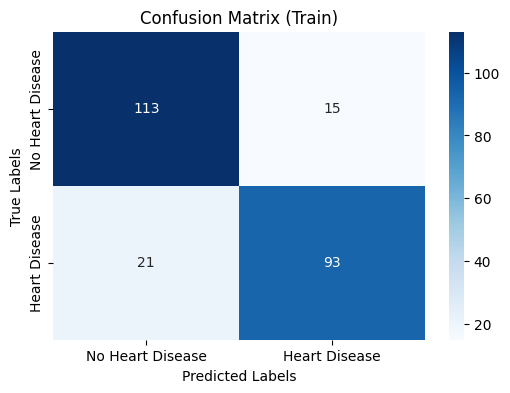

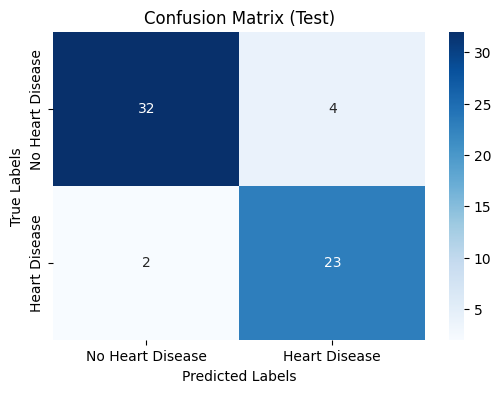

In [27]:
import matplotlib.pyplot as plt


labels = ['No Heart Disease', 'Heart Disease']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train)')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test)')
plt.show()